In [13]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version =1)
mnist.keys()
import numpy as np

In [14]:
X,y = mnist["data"],mnist["target"]
print(X.shape,y.shape)

(70000, 784) (70000,)


In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [16]:
print(X.iloc[0])

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64


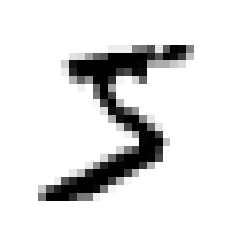

In [17]:
some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()


In [18]:
print(y[0])

5


In [19]:
y=y.astype(np.uint8)
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8


In [20]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]


In [21]:
#training a binary classifier ( to detect if 5 or not 5)

In [35]:
y_train_5=(y_train == 5)
y_test_5 = (y_test == 5)



60000
10000
0      True
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: class, Length: 100, dtype: bool
0     5
1     0
2     4
3     1
4     9
     ..
95    0
96    7
97    8
98    3
99    1
Name: class, Length: 100, dtype: uint8


<bound method NDFrame.head of 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: uint8>

In [23]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)
sgd_clf.predict([some_digit])


array([ True])

In [24]:
from sklearn.model_selection import cross_val_score
>>> cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [36]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)



[53892   687]


[1891 3530]
